In [2]:
from __future__ import print_function
import argparse
import torch
print(torch.__version__)
import torch.nn as NN
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

1.7.1


In [17]:
# Define the model
class Net(NN.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = NN.Conv2d(1, 20, 5, stride=1)
        self.conv2 = NN.Conv2d(20, 50, 5, stride=1)
        self.pool = NN.MaxPool2d(2, 2)
        self.fc1 = NN.Linear(4*4*50, 20)
        self.fc2 = NN.Linear(20, 10)

    def forward(self, x):
        print(len(x[0][0]))
        x = self.pool( F.relu(self.conv1(x)) )
        print(len(x))
        x = self.pool( F.relu(self.conv2(x)) )
        print(len(x))
        x = x.view(-1, 4*4*50)
        print(len(x))
        x = F.relu(self.fc1(x))
        print(len(x))
        x = self.fc2(x)
        print(len(x))
        return F.log_softmax(x, dim=1)
        
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        #output = model(torch.autograd.Variable(data))
        output = model( data )
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [3]:
train_batchsize = 64
test_batchsize = 1000
trainEpochs = 10
learningRate = 0.01
sgdmomentum = 0.9
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

trainset = datasets.MNIST(root='../data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batchsize, shuffle=True)

testset = datasets.MNIST(root='../data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batchsize, shuffle=False)

In [4]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [5]:
# Check samples I
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([1000, 1, 28, 28])

Matplotlib is building the font cache; this may take a moment.


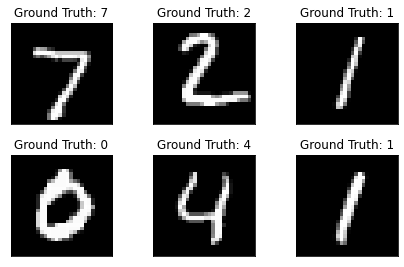

In [7]:
# Check samples II
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].numpy(), cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

In [18]:
# Train and test
model = Net()
optimizer = optim.SGD(model.parameters(), lr=learningRate, momentum = sgdmomentum)

for epoch in range(trainEpochs):
    train(model, trainloader, optimizer, epoch)
    test(model, testloader)


28
64
64
64
64
64
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.288574
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
28
64
64
64
64
64
2

KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(),"mnist_cnn.pt")

In [10]:
x=torch.randn(4,3)
x=x.view(12)
x

tensor([ 0.5803, -0.8276,  0.0083,  1.5698, -0.8077,  0.1814,  0.1372, -1.1263,
         0.6333, -0.2212, -0.4742,  0.0534])